*Note: This code was a team effort by Group 1.*

# **Mutlilevel Analysis**

In order to perform a multilevel analysis, the Pymer4 tool has been used, as proposed by Jolly (2018).

Reference:
Jolly, (2018). Pymer4: Connecting R and Python for Linear Mixed Modeling. Journal of Open Source Software, 3(31), 862, https://doi.org/10.21105/joss.00862

In [100]:
# import some basic libraries
import os
import pandas as pd


os.environ["R_HOME"] = "/Library/Frameworks/R.framework/Resources"


# import utility function for sample data path
from pymer4.utils import get_resource_path

## **1. Loading the data**

Loading the cleaned dataset 'combined_themepark_dataset.csv' into a pandas DataFrame.

In [101]:
# Get the directory of the current Jupyter Notebook file
notebook_directory = os.path.dirname(os.path.abspath('__file__'))

# Specify the relative path to the folder containing the CSV file
folder_path = os.path.join(notebook_directory, '02_new dataframes')

# Specify the file name
file_name = 'H4_dataframe.csv'

# Construct the full path to the CSV file
csv_file_path = os.path.join(folder_path, file_name)

# Read the CSV file into a DataFrame
df = pd.read_csv(csv_file_path)

# Print the first few rows of the DataFrame to verify that it was read successfully
df.head()

,date,profile,message,nr_reactions,nr_comments,nr_shares,comments/post,post_interaction_rate,engagement,nr_likes,link_posts,picture_posts,video_posts,profile_id,post_id,link,followers,has_emoji
0,12/31/23 9:40 PM,wild adventures theme park,🎟️🚨 Today's the FINAL day to use your 2023 Sea...,16,2,2,2,"1,09E+12",1.090000e+12,13,NaN,1.0,NaN,84679583132,84679583132_770120045161180,https://www.facebook.com/617429960430190/posts...,66.0,1
1,12/31/23 8:01 PM,fun spot america,See you next year! 😉 Don’t miss...,38,1,2,1,"4,17E+11",4.170000e+11,33,NaN,NaN,NaN,"1,8402E+11",184020466977_767286052104076,https://www.facebook.com/653224623510220/posts...,100000.0,1
2,12/31/23 7:30 PM,fun spot america,Don't miss our HUGE firework display ! 🥳\n\n#f...,23,2,3,2,"2,85E+11",2.850000e+11,21,NaN,NaN,1.0,"1,8402E+11",184020466977_767267948772553,https://www.facebook.com/653224623510220/posts...,100000.0,1
3,12/31/23 7:00 PM,disneyland paris,Fijne jaarwisseling! 🥂🎉\nEn tot volgend jaar 😉,646,52,12,56,"1,36E+11",1.360000e+11,478,NaN,1.0,NaN,"6,52389E+14",652389081615295_775974521237956,https://www.facebook.com/724434559725286/posts...,NaN,1
4,12/31/23 7:00 PM,silverwood theme park,It's the last day of our New Year's Sale! Save...,17,2,0,2,"4,96E+11",4.960000e+11,16,NaN,NaN,1.0,"7,62702E+14",762701550509617_678920137770716,https://www.facebook.com/562559642740100/posts...,381000.0,0


### **2. Model fitting**

In [102]:
from pymer4.models import Lmer

# Define the formula for the multilevel regression model
formula = 'engagement ~ nr_reactions + has_emoji + (1|profile)'

# Create an instance of the Lmer model
model = Lmer(formula, data=df)

# Fit the model to the data
model.fit()

# Print a summary of the fitted model
print(model.summary())

Linear mixed model fit by REML [’lmerMod’]
Formula: engagement~nr_reactions+has_emoji+(1|profile)

Family: gaussian	 Inference: parametric

Number of observations: 15443	 Groups: {'profile': 59.0}

Log-likelihood: -449430.218 	 AIC: 898870.435

Random effects:

                 Name           Var           Std
profile   (Intercept)  8.694048e+22  2.948567e+11
Residual               1.108398e+24  1.052805e+12

No random effect correlations specified

Fixed effects:

Linear mixed model fit by REML [’lmerMod’]
Formula: engagement~nr_reactions+has_emoji+(1|profile)

Family: gaussian	 Inference: parametric

Number of observations: 15443	 Groups: {'profile': 59.0}

Log-likelihood: -449430.218 	 AIC: 898870.435

Random effects:

                 Name           Var           Std
profile   (Intercept)  8.694048e+22  2.948567e+11
Residual               1.108398e+24  1.052805e+12

No random effect correlations specified

Fixed effects:

                  Estimate        2.5_ci       97.5_ci      

In [103]:
# Get population level coefficients
print(model.coefs)

                  Estimate        2.5_ci       97.5_ci            SE  \
(Intercept)   7.600720e+11  6.787333e+11  8.414106e+11  4.150007e+10   
nr_reactions -7.354422e+06 -1.196241e+07 -2.746437e+06  2.351056e+06   
has_emoji    -1.079017e+10 -4.954297e+10  2.796263e+10  1.977220e+10   

                        DF     T-stat         P-val  Sig  
(Intercept)   6.377618e+01  18.314958  4.306195e-27  ***  
nr_reactions  5.317836e+06  -3.128136  1.759199e-03   **  
has_emoji     1.534580e+05  -0.545724  5.852564e-01       


In [104]:
# Get group level coefficients (just the first 5)
# Each row here is a unique intercept and slope
# which vary because we parameterized our rfx that way above
print(model.fixef.head(5))

                                  (Intercept)  nr_reactions     has_emoji
acn - america's coaster network  1.078562e+11 -7.354422e+06 -1.079017e+10
adventure city                   9.373215e+11 -7.354422e+06 -1.079017e+10
belmont park                     9.494745e+11 -7.354422e+06 -1.079017e+10
big kahuna's nj                  6.397893e+11 -7.354422e+06 -1.079017e+10
busch gardens tampa bay          1.164889e+12 -7.354422e+06 -1.079017e+10


In [105]:
# Get group level deviates from population level coefficients (i.e. rfx)
print(model.ranef.head(5))

                                 X.Intercept.
acn - america's coaster network -6.522157e+11
adventure city                   1.772496e+11
belmont park                     1.894026e+11
big kahuna's nj                 -1.202826e+11
busch gardens tampa bay          4.048167e+11


<Axes: xlabel='Estimate'>

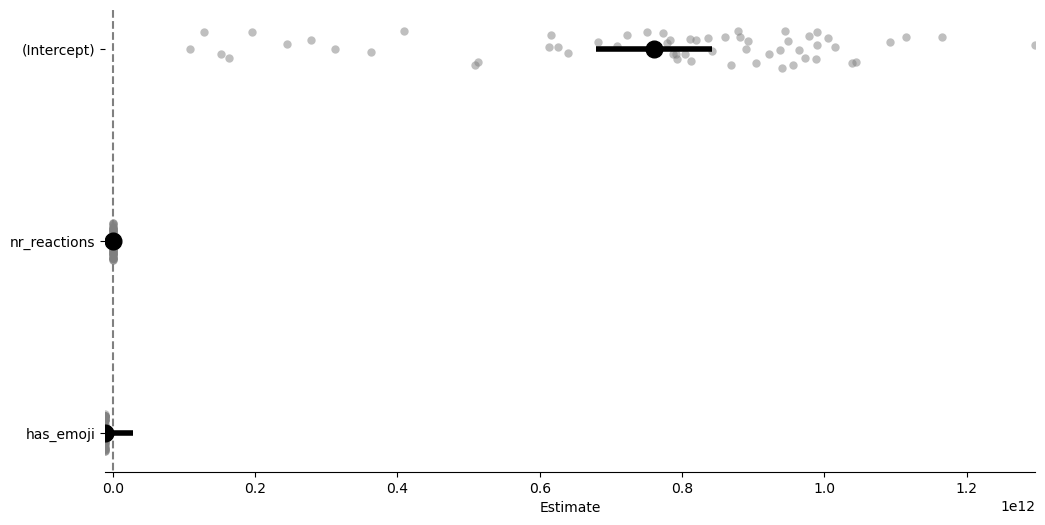

In [106]:
# Visualize coefficients with group/cluster fits overlaid ("forest plot")
model.plot_summary()

<Axes: xlabel='has_emoji', ylabel='predicted engagement'>

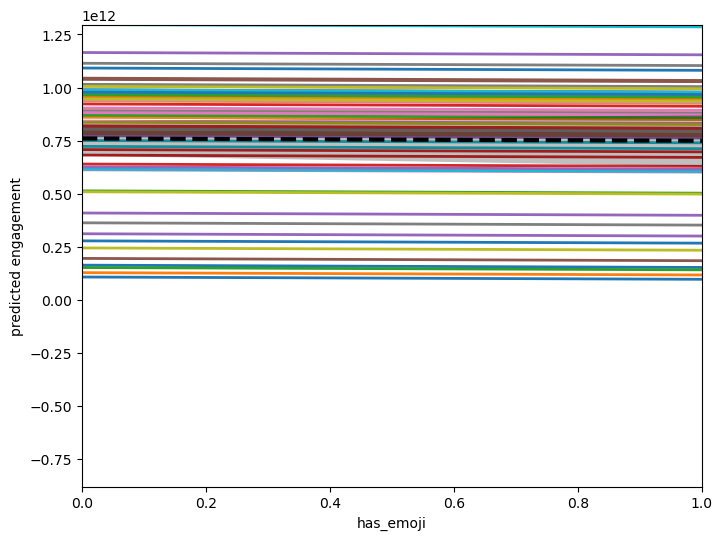

In [107]:
# Plot coefficients for each group/cluster as separate regressions
model.plot("has_emoji", plot_ci=True, ylabel="predicted engagement")

## **3. Interpretation**